# Summer Olympics Data Analysis Assignment

In [149]:
#Importing Libraries
import pandas as pd

In [150]:
#Reading data from csv
data = pd.read_csv('summer.csv')

In [151]:
# printing data
data

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [152]:
#counting null values in dataset
data.isnull().sum()
#4 null values in column Country

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [153]:
#removing null values from dataset
data.dropna(inplace=True)
data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [154]:
data
#rows reduced to 31161 after dropping nan values

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


1. In how many countries Summer Olympics is held so far?

In [155]:
data['Country'].unique()
len(data['Country'].unique()) #147 after removing nan
#Olympics had held in 147 countries so far

147

2. Which sport is having most number of Gold Medals so far? (Top 5)

In [156]:
#extracting sports with gold medal won
sport_with_gold=data[data['Medal']=="Gold"]['Sport']
sport_lst=[]
#counting sport length and storing to list
for sport in sport_with_gold.unique():
    sport_lst.append([sport,len(sport_with_gold[sport_with_gold==sport])])

<AxesSubplot:xlabel='Sport'>

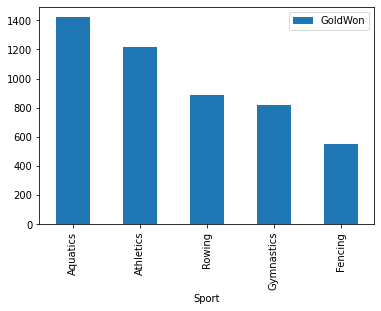

In [157]:
#creating dataframe with sports
sport_data=pd.DataFrame(sport_lst,columns=['Sport','GoldWon'])
#plotting for top 5 sport with max gold medal
sport_data.sort_values(by='GoldWon',ascending=False).head().plot(x='Sport',y='GoldWon',kind='bar')

#o/p: 
#1)Aquatics 1421
#2)Athletics 1214
#3)Rowing 890 
#4)Gymnastics 820 
#5)Fencing 552


3. Which sport is having most number of medals so far? (Top 5)

<AxesSubplot:xlabel='Sport'>

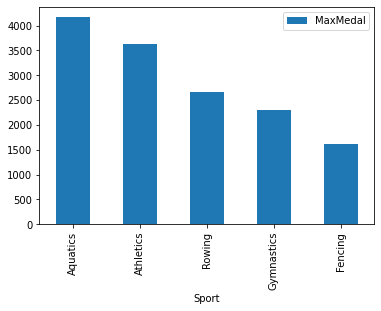

In [158]:
#sport with max count will have max medals in total
sport_with_max_medal=[]
#appending list with count and sport_type 
for sport in data['Sport'].unique():
    sport_with_max_medal.append([sport,len(data[data['Sport']==sport])])

#creating dataframe with sports
maxmedalsport_data=pd.DataFrame(sport_with_max_medal,columns=['Sport','MaxMedal'])
#plotting for top 5 sport wwith max medal
maxmedalsport_data.sort_values(by='MaxMedal',ascending=False).head().plot(x='Sport',y='MaxMedal',kind='bar')

#o/p:
    #Aquatics	4170
    #Athletics	3637
    #Rowing	2667
    #Gymnastics	2307
    #Fencing	1613

4. Which player has won most number of medals? (Top 5)

<AxesSubplot:xlabel='Athlete'>

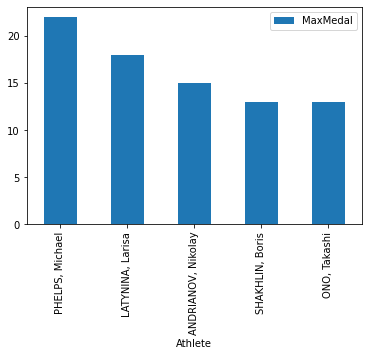

In [159]:
#player with max frequency is the one who won max medals
player_with_max_medal=[]
#appending list with count and sport_type 
for athlete in data['Athlete'].unique():
    player_with_max_medal.append([athlete,len(data[data['Athlete']==athlete])])

#creating dataframe with Player_freq in dataset
maxmedalplayer_data=pd.DataFrame(player_with_max_medal,columns=['Athlete','MaxMedal'])
#plotting for top 5 countries wo won gold medal
maxmedalplayer_data.sort_values(by='MaxMedal',ascending=False).head().plot(x='Athlete',y='MaxMedal',kind='bar')

#o/p gained: 
#PHELPS, Michael	22
#LATYNINA, Larisa	18
#ANDRIANOV, Nikolay	15
#SHAKHLIN, Boris	13
#ONO, Takashi	13

5. Which player has won most number Gold Medals of medals? (Top 5)

In [160]:
#extracting Athlete with gold medal won
athlete_with_gold=data[data['Medal']=="Gold"]['Athlete']
athlete_lst=[]
#counting Athlete length and storing to list
for athlete in athlete_with_gold.unique():
    athlete_lst.append([athlete,len(athlete_with_gold[athlete_with_gold==athlete])])
#athlete_lst contains all athlete with frequency of gold won

<AxesSubplot:xlabel='Athlete'>

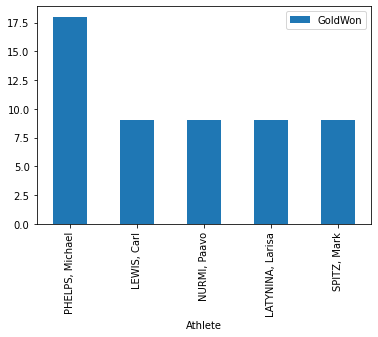

In [161]:
#creating dataframe with sports
athlete_data=pd.DataFrame(athlete_lst,columns=['Athlete','GoldWon'])
#plotting for top 5 sport with max gold medal
athlete_data.sort_values(by='GoldWon',ascending=False).head().plot(x='Athlete',y='GoldWon',kind='bar')

#o/p:  
#PHELPS, Michael	18
#LEWIS, Carl	9
#NURMI, Paavo	9
#LATYNINA, Larisa	9
#SPITZ, Mark	9


In [162]:
athlete_data.sort_values(by='GoldWon',ascending=False).head()

,Athlete,GoldWon
6851,"PHELPS, Michael",18
4630,"LEWIS, Carl",9
907,"NURMI, Paavo",9
2714,"LATYNINA, Larisa",9
3320,"SPITZ, Mark",9


6. In which year India won first Gold Medal in Summer Olympics?

In [163]:
India=data[data['Country']=='IND'] 
gold_india_won=India[India['Medal']=='Gold']
min(gold_india_won['Year']) #1928

#o/p: India won first gold in 1928

1928

7. Which event is most popular in terms on number of players? (Top 5)

<AxesSubplot:xlabel='Event'>

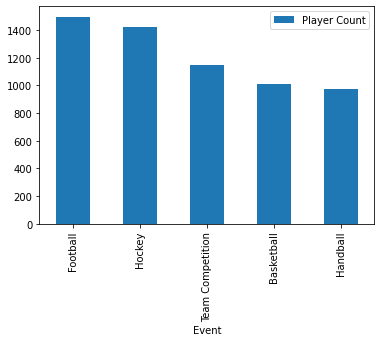

In [164]:
#most popular event is the most occured event
event_=[]
for event in data['Event'].unique():
    event_.append([event,len(data[data['Event']==event])])
event_df=pd.DataFrame(event_,columns=['Event','Player Count'])
event_df.sort_values(by='Player Count',ascending=False).head().plot(x='Event',y='Player Count',kind='bar')

#o/p popular event in terms of no. of player:
#Football	1497
#Hockey	1422
#Team Competition	1147
#Basketball	1012
#Handball	973

8. Which sport is having most female Gold Medalists?

In [165]:
#extracting womens from dataset
women=data[data['Gender']=='Women']
#extracting them who won gold
women_with_gold=women[women['Medal']== 'Gold']
sport_with_women_gold=[]
#sport wise calculating frequency of gold wons
for sport in women_with_gold['Sport'].unique():
    sport_with_women_gold.append([sport,len(women_with_gold[women_with_gold['Sport']==sport])])

<AxesSubplot:xlabel='Sport'>

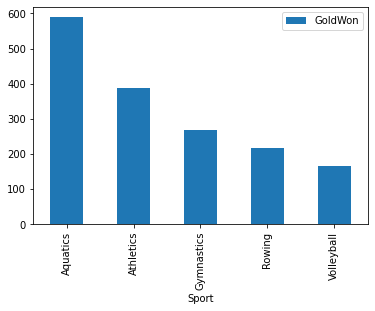

In [166]:
#creatinf dataframe and plotting for top 5
df=pd.DataFrame(sport_with_women_gold,columns=['Sport','GoldWon'])
df.sort_values(by='GoldWon',ascending=False).head().plot(x='Sport',y='GoldWon',kind='bar')

#o/p: Women with max gold won in sports listed:
#Aquatics	589
#Athletics	388
#Gymnastics	268
#Rowing	217
#Volleyball	166